# Simple linear regression without using libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#read the dataset
df = pd.read_csv('slr1.csv')
df

,x,y
0,1,1
1,2,3
2,3,2
3,4,3
4,5,5


In [4]:
x= np.array(df[['x']])
x

array([[1],
       [2],
       [3],
       [4],
       [5]], dtype=int64)

In [5]:
y = np.array(df[['y']])
y

array([[1],
       [3],
       [2],
       [3],
       [5]], dtype=int64)

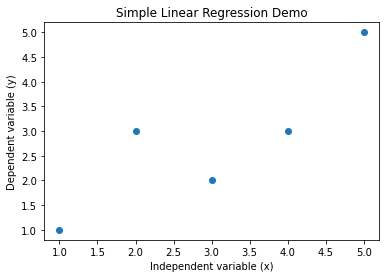

In [6]:
#plot the graph of training data
plt.scatter(x,y)
plt.xlabel("Independent variable (x)")
plt.ylabel("Dependent variable (y)")
plt.title("Simple Linear Regression Demo")
plt.show()

#compute y=mx+c
#m=sum(xi-mean(x)*(yi-mean(y))/sum(xi-mean(x))^2
#c=mean(y)-m*mean(x)      

In [7]:
x_mean = np.mean(x)
x_mean

3.0

In [8]:
y_mean = np.mean(y)
y_mean

2.8

In [9]:
#computing m and c
numerator = 0
denominator = 0
for i in range(len(x)):
    numerator += (x[i] - x_mean) * (y[i] - y_mean)
    denominator += (x[i] - x_mean) **2
    
m = numerator / denominator
c = y_mean - m * x_mean
print("Slope m: ", m, " y- intercept c: ", c)

Slope m:  [0.8]  y- intercept c:  [0.4]


In [ ]:
#The estimated regression line is y=0.8*x+0.4

In [10]:
#predict y when x = 6
y_predict6 = m * 6 + c
y_predict6

array([5.2])

In [11]:
#predict y when x = 7
y_predict7 = m * 7 + c
y_predict7

array([6.])

In [12]:
#predict y when x = 5
y_predict5 = m * 5 + c
y_predict5

array([4.4])

In [13]:
y_predict = m * x + c
print("Predicted y values ", y_predict)

Predicted y values  [[1.2]
 [2. ]
 [2.8]
 [3.6]
 [4.4]]


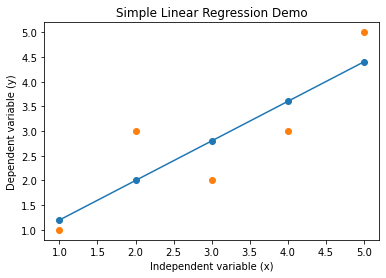

In [15]:
#plotting predicted and actual values
plt.plot(x, y_predict)
plt.scatter(x, y_predict)
plt.scatter(x, y)
plt.xlabel("Independent variable (x)")
plt.ylabel("Dependent variable (y)")
plt.title("Simple Linear Regression Demo")
plt.show()

In [16]:
#compute RMSE
num_rmse = 0
for i in range(len(x)):
    num_rmse += (y_predict[i] - y[i])**2
    
rmse = np.sqrt(num_rmse/len(x))
print("RMSE ", rmse)

RMSE  [0.69282032]


# Simple Linear Regression with library

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
slr_model = LinearRegression()

In [20]:
slr_model.fit(x,y)

LinearRegression()

In [21]:
#slope, m
slr_model.coef_

array([[0.8]])

In [22]:
#y-intercept, c
slr_model.intercept_

array([0.4])

In [23]:
slr_model.predict([[6]])

array([[5.2]])

In [24]:
slr_model.predict([[7]])

array([[6.]])

In [25]:
slr_model.predict([[5]])

array([[4.4]])

In [33]:
sklearn_ypredict = slr_model.predict(x)
sklearn_ypredict

array([[1.2],
       [2. ],
       [2.8],
       [3.6],
       [4.4]])

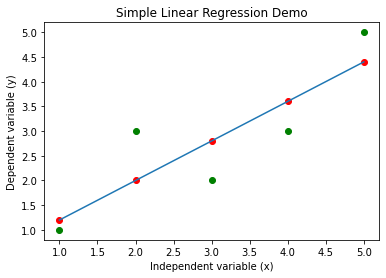

In [34]:
#plotting predicted and actual values 
plt.plot(x, sklearn_ypredict)
plt.scatter(x, sklearn_ypredict, c='r')
plt.scatter(x, y, c='g')
plt.xlabel("Independent variable (x)")
plt.ylabel("Dependent variable (y)")
plt.title("Simple Linear Regression Demo")
plt.show()

In [35]:
#compute RMSE
from sklearn.metrics import mean_squared_error

In [36]:
sklear_rmse = np.sqrt(mean_squared_error(y, sklearn_ypredict))
sklear_rmse

0.692820323027551

# Salary Prediction

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [38]:
df = pd.read_csv("Salary_Data.csv")

In [39]:
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [40]:
df

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


In [41]:
x = df[['YearsExperience']]

In [42]:
x

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2
5,2.9
6,3.0
7,3.2
8,3.2
9,3.7


In [43]:
y = df[['Salary']]

In [44]:
y

,Salary
0,39343
1,46205
2,37731
3,43525
4,39891
5,56642
6,60150
7,54445
8,64445
9,57189


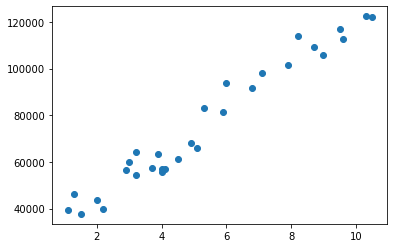

In [45]:
plt.scatter(x,y)
plt.show()

Split dataset train and test

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [48]:
x_train,y_train

(    YearsExperience
 27              9.6
 11              4.0
 17              5.3
 22              7.9
 5               2.9
 16              5.1
 8               3.2
 14              4.5
 23              8.2
 20              6.8
 1               1.3
 29             10.5
 6               3.0
 4               2.2
 18              5.9
 19              6.0
 9               3.7
 7               3.2
 25              9.0
 3               2.0
 0               1.1
 21              7.1
 15              4.9
 12              4.0,
     Salary
 27  112635
 11   55794
 17   83088
 22  101302
 5    56642
 16   66029
 8    64445
 14   61111
 23  113812
 20   91738
 1    46205
 29  121872
 6    60150
 4    39891
 18   81363
 19   93940
 9    57189
 7    54445
 25  105582
 3    43525
 0    39343
 21   98273
 15   67938
 12   56957)

In [49]:
x_test, y_test

(    YearsExperience
 2               1.5
 28             10.3
 13              4.1
 10              3.9
 26              9.5
 24              8.7,
     Salary
 2    37731
 28  122391
 13   57081
 10   63218
 26  116969
 24  109431)

In [50]:
model = LinearRegression()

In [51]:
model.fit(x_train, y_train)

LinearRegression()

In [52]:
model.coef_

array([[9312.57512673]])

In [53]:
model.intercept_

array([26780.09915063])

In [54]:
model.predict([[2.9]])

array([[53786.56701814]])

In [55]:
salpredict = model.predict(x_test)
salpredict

array([[ 40748.96184072],
       [122699.62295594],
       [ 64961.65717022],
       [ 63099.14214487],
       [115249.56285456],
       [107799.50275317]])